<img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY" style="display:block; margin:auto; border:0px solid red;" width=50% height='250'/>

<p style="background-color:romance; color:plum; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bold; font-size:220%; line-height:1.4; text-transform: uppercase;">WAY TO REINVENT YOURSELF</p>

<img src="https://storage.googleapis.com/kaggle-datasets-images/2048906/3398924/7a46d6d73d297ca54a197279179826b2/dataset-cover.jpg?t=2022-04-03-00-26-13" style="display:block; margin:auto; border:1px solid LightGrey;" width=75% height='250'/>

<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bolder; font-size:3em; line-height:1.4; text-transform:capitalize;"><strong>Raisin Class Prediction Classification</strong></p>

<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:normal; font-size:2em; line-height:1.4; text-transform:capitalize;">Classification Problems with EDA</p> 

<basefont size="2" face ="arial, verdana, sans-serif" color="jaguar">

Data Set Information:

- https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# 1. Import Libraries, Load Dataset, Exploring Data

## Import Libraries

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
# pd.set_option('display.float_format', lambda x: f'{x:.6f}')
# pd.set_option('display.float_format', lambda x: '%.6f' % x)
# pd.options.display.float_format = '{:.3f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 60)

In [172]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

#Enabling the offline mode for interactive plotting locally
# conda install -c conda-forge python-cufflinks 
import cufflinks as cf
cf.go_offline()
import plotly.offline as py
from plotly.offline import plot, iplot
from plotly.offline import init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)

# To display the plots
# %matplotlib inline

In [173]:
params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'c',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("whitegrid")

In [174]:
random_state=42

## Ingest Data from links below and make a dataframe

In [175]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

r = urlopen(r'https://archive.ics.uci.edu/ml/machine-learning-databases/00617/Raisin_Dataset.zip').read()
file = ZipFile(BytesIO(r))

df_origin = pd.read_excel(file.open('Raisin_Dataset/Raisin_Dataset.xlsx'))
df = df_origin
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [176]:
df.shape

(900, 8)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [178]:
df.describe().T.style.background_gradient(cmap='PiYG', axis=1)

,count,mean,std,min,25%,50%,75%,max
Area,900.000000,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.000000,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.000000,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.000000,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.000000,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.000000,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.000000,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [179]:
df.describe(include='O').T

,count,unique,top,freq
Class,900,2,Kecimen,450


# 2. Exploratory Data Analysis and Visualization

## Check Target Feature

In [180]:
df["Class"].value_counts(normalize=True).to_frame(name='percentage').reset_index()

,index,percentage
0,Kecimen,0.5
1,Besni,0.5


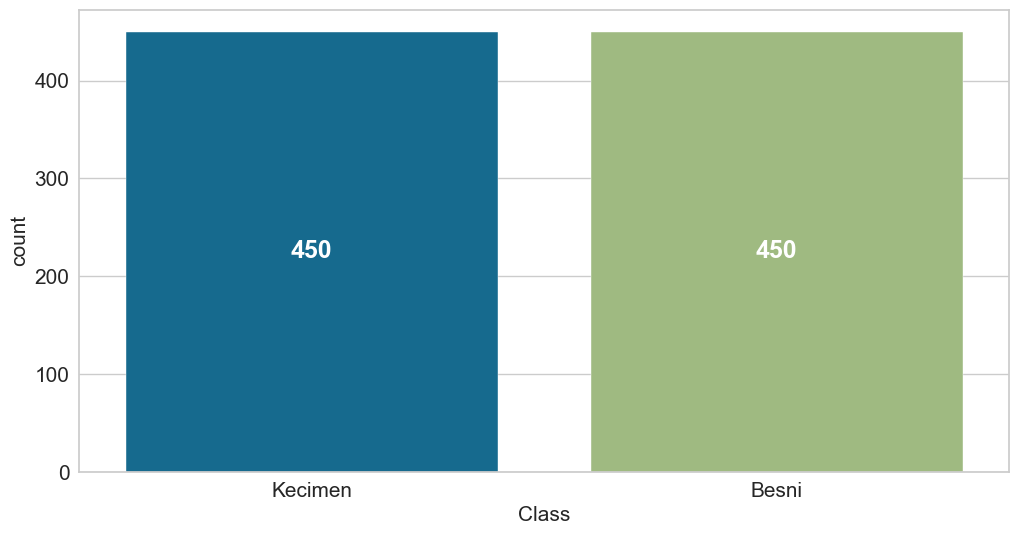

In [181]:
# to show the proportion of each class
g = sns.countplot(df["Class"])
g.bar_label(g.containers[0], label_type='center', fontsize=18, color='w', weight='bold');

- We have prety same amout of classes in the data set. So I can use accuracy as a metric to evaluate the performance of the classifier.

<AxesSubplot:title={'center':'Percentage of Class'}>

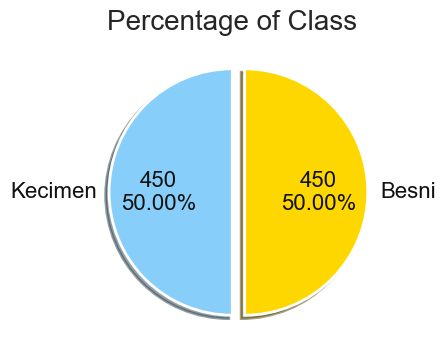

In [182]:
df["Class"].value_counts(normalize=True).plot.pie(
#     subplots=True, layout=(1,2),
#     legend=False,
    explode=[0, 0.1],
    shadow=True,
    colors=["LightSkyBlue",  "gold"],
    textprops={'fontsize':16, 'color':'k'},
    wedgeprops = {'linewidth':2, 'edgecolor':'white'},
    autopct=lambda x: '{:.0f}\n{:.2f}%'.format(len(df['Class'])*x/100, x), # "%.1f%%"
#     lambda x: '{:.0f}\n{:.2f}%'.format(len(df['species'])*x/100, x) 
#     lambda x: f'{(x/100*len(df['species'])):.0f}\n{x:.2f}%'
    startangle=90,
    title="Percentage of Class",
    ylabel= "",
#     labels=['Kecimen', 'Besni'],
    figsize=(4, 4),
)

In [183]:
# fig = make_subplots(specs=[[{'type':'domain'}]]) # go.Figure()
# fig.add_trace(go.Pie(
#     labels=df['Class'],
#     textinfo='label+value+percent',
#     textposition='inside',
#     pull=[0.05, 0.05],
# #     hole=.3,
#     title=dict(text='Percentage of Class', font_size=20, position='top center'),
# ), row=1, col=1)
# fig.update_layout(
#     height=450, width=450
# #     annotations=[dict(text='Class', x=0.5, y=0.5, font_size=20, showarrow=False)]
# )
# fig.show()

## Make Numeric Target Feature

In [184]:
df_origin['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [185]:
df_origin['Class'].astype('category').cat.codes.value_counts()

1    450
0    450
dtype: int64

In [186]:
df_origin[['Class']].apply(lambda x: pd.factorize(x, sort=True)[0]).value_counts()

Class
0        450
1        450
dtype: int64

In [187]:
# mapping the classes to 0 and 1
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) 

## Graphical analysis

### Multicolinarity Check Colorized Correlation

In [188]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [189]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df)

Multicolinarity Data (5, 5)


,Area,MajorAxisLength,MinorAxisLength,ConvexArea,Perimeter
Area,nan,0.932774,0.906650,0.995920,0.961352
MajorAxisLength,0.932774,nan,nan,0.945031,0.977978
MinorAxisLength,0.906650,nan,nan,nan,nan
ConvexArea,0.995920,0.945031,nan,nan,0.976612
Perimeter,0.961352,0.977978,nan,0.976612,nan


In [190]:
df.corr()['Class'].sort_values(key=abs, ascending=False)

Class              1.000000
MajorAxisLength    0.673194
Perimeter          0.665981
Area               0.625715
ConvexArea         0.625567
MinorAxisLength    0.503102
Eccentricity       0.438500
Extent            -0.154689
Name: Class, dtype: float64

### Heatmap

<AxesSubplot:>

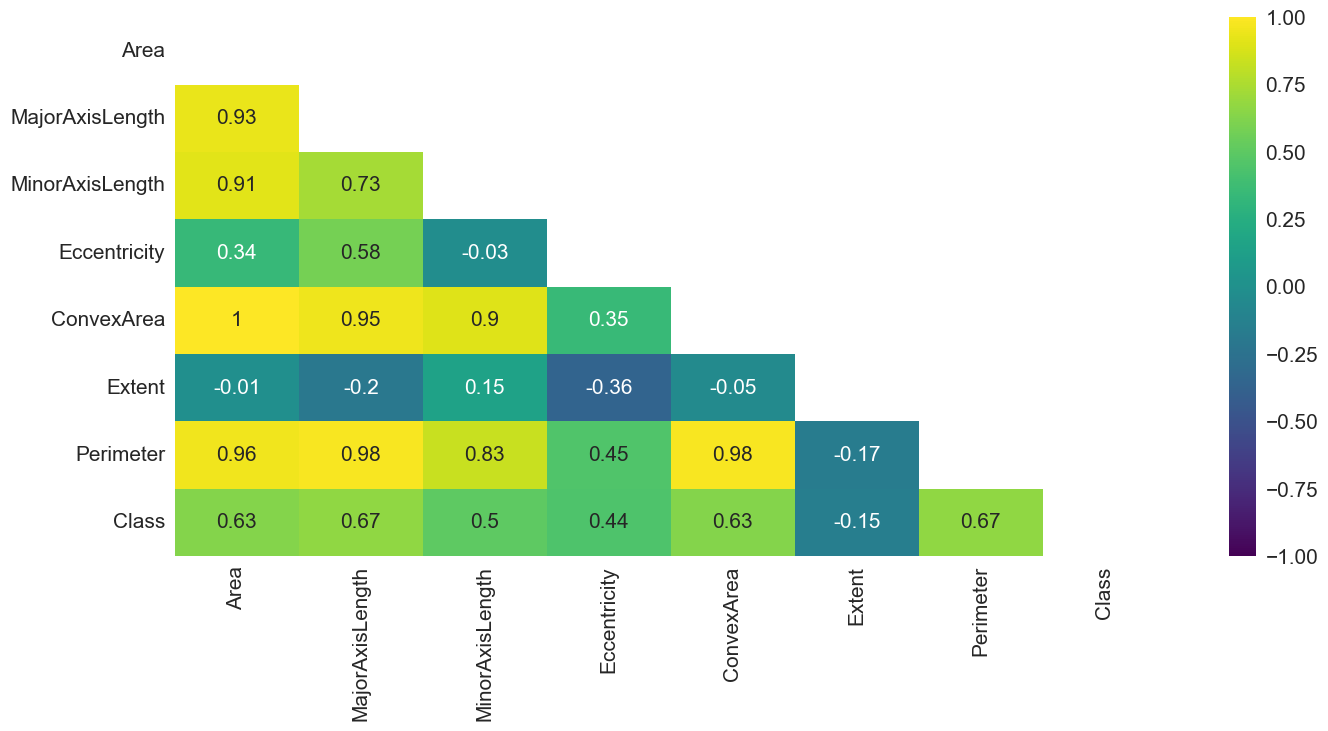

In [191]:
plt.figure(figsize=(16,7))
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, 
    cmap='viridis'
)

In [192]:
fig = px.imshow(
    df.corr().round(2), 
    text_auto=True, zmin=-1, zmax=1,
    color_continuous_scale='viridis',
    aspect="auto",
)
fig.show()

In [193]:
df.iloc[:,:-1].iplot(
    kind="box",
    theme = 'polar',
    dimensions =(800,400),
    title= '', 
    xTitle = '', 
    yTitle= '',  
)

In [194]:
df.iplot(
    kind="bar",
    theme = 'polar',
    dimensions =(800,400),
    title= '', 
    xTitle = '', 
    yTitle= '',  
)

In [195]:
fig = px.box(
    df, 
    color="Class", color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'},
    height=450, width=900,
)
fig.show()

In [196]:
fig = px.bar(
    df,
    x=df.index,
    y="Area",
    color="Class",
    color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'},
    height=450, width=800,
)
fig.show()

### Pairplot - Distribution of Features

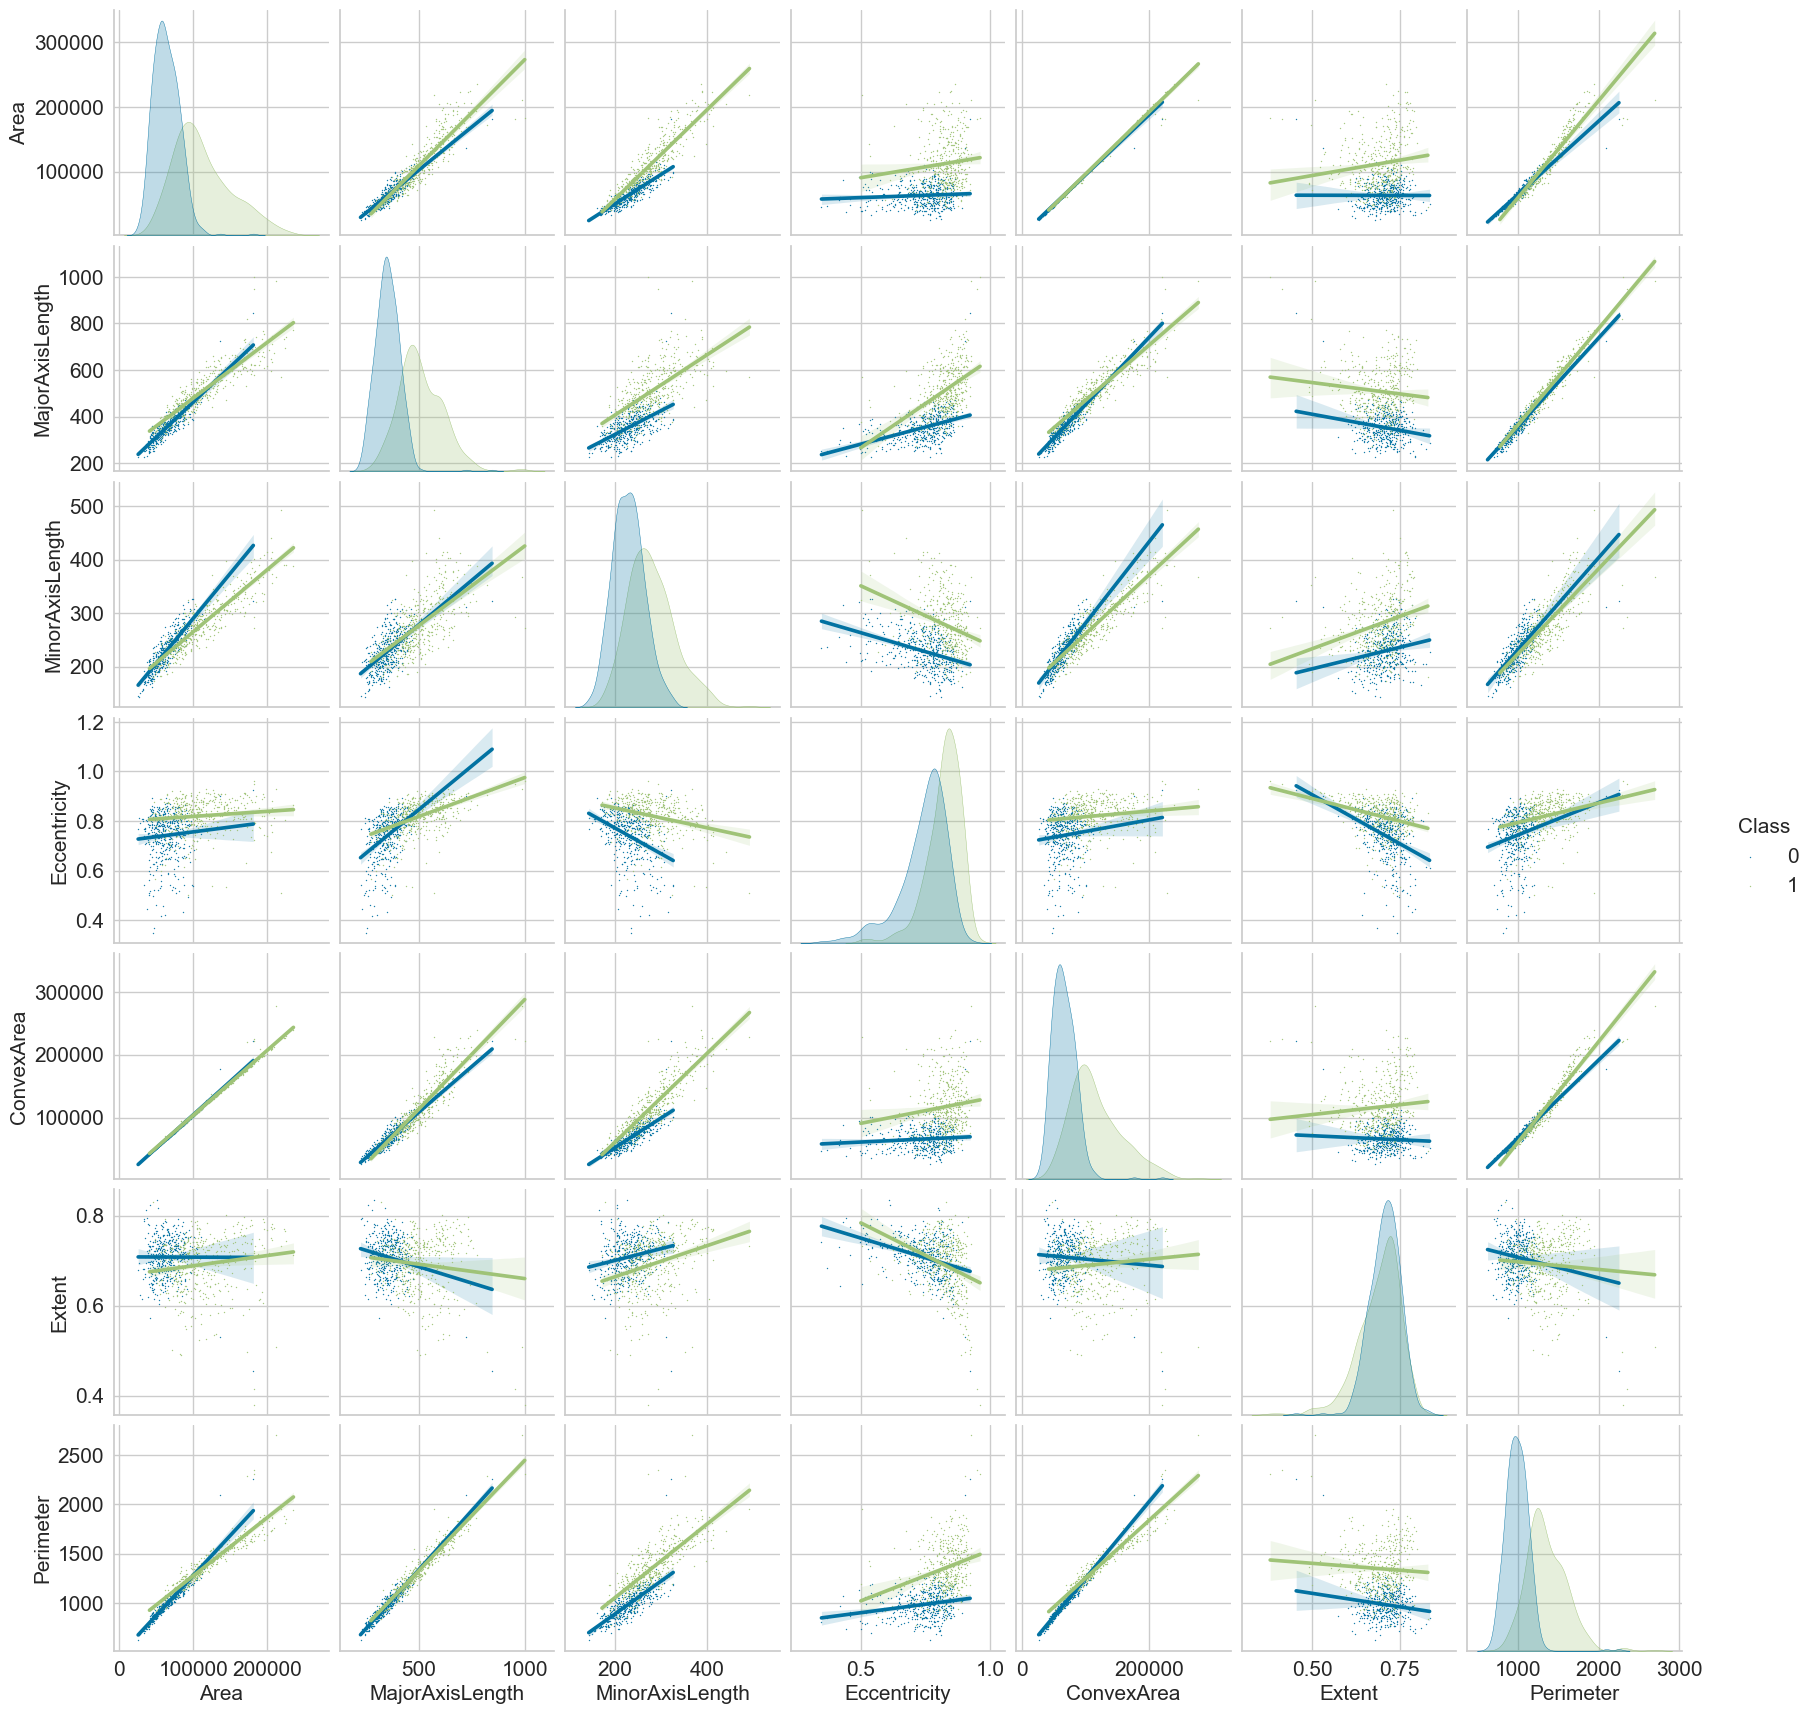

In [197]:
sns.pairplot(df, hue="Class", kind='reg', plot_kws={'scatter_kws':{'alpha':0.9, 's':1}})

# Data Preprocessing 

## Import Libraries

In [198]:
# conda install -c anaconda scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# Supervised-Regression-metrics
# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [199]:
# conda install -c districtdatalabs yellowbrick
# yellowbrick library for visualizing the model performance
from yellowbrick.cluster import KElbowVisualizer 

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

# conda install -c conda-forge scikit-plot
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

### Features and Target variable Split
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [200]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [201]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [202]:
y.describe()

count    900.000000
mean       0.500000
std        0.500278
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

## Train | Test Split and Scaling

* for train_test_split use fallowing arguments:
    * train_size: 0.2
    * stratify: True
    * random_state: 10    
* Use StandardScaler to scale the data.

In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

## `OneHotEncoder` and `LabelEncoder`for X_train and X_test

In [204]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

# cat = X_train.select_dtypes("object").columns.to_list()
# column_trans = make_column_transformer(
#     (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
#     remainder=MinMaxScaler()
# )

In [205]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)

# pd.DataFrame(y_test).value_counts().sort_index()

# Parametric Based Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [206]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test, model_name='', average=None, labels=None):
    """ average (None, 'micro', 'macro', 'samples', 'weighted', 'binary')"""
    # The style parameters control properties like the color of the background and whether a grid is enabled by default.
    sns.set_style("whitegrid", {'axes.grid' : False})
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    fig, ax = plt.subplots(2, 1, figsize=(6, 6))
    plot_confusion_matrix(model, X_test, y_test, ax=ax[0]);
    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train, ax=ax[1]);
    plt.tight_layout()
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_pred_test),
        'f1_test'       :np.array(f1_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'recall_test'   :np.array(recall_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'precision_test':np.array(precision_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],        
        'accuracy_train' :accuracy_score(y_train, y_pred_train),
        'f1_train'       :np.array(f1_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],        
        'recall_train'   :np.array(recall_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
        'precision_train':np.array(precision_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
    }, orient='index', columns=[model_name]).T

In [207]:
def eval_metric2(model, X_train, y_train, X_test, y_test):
    """ to get the metrics for the model """
    y_pred_train = model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))

## 1. Implement Logistic Regression Model

* Train the model using the training set with the default parameters.

### Vanilla Logistic Regression Model

In [208]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# will be used in the pipelines
scaler = StandardScaler() 
log_model = LogisticRegression(
    random_state=random_state
)
# pipeline for logistic regression
pipe_log = Pipeline([
    ("scaler",scaler),
    ("log_model",log_model)
]) 
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression(random_state=42))])

In [209]:
y_pred_test = pipe_log.predict(X_test)
y_pred_train = pipe_log.predict(X_train)

In [210]:
pd.DataFrame.from_dict({"Pred":y_pred_test})

,Pred
0,0
1,0
2,0
3,1
4,0
...,...
175,0
176,0
177,0
178,0


In [211]:
y_pred_test_proba = pipe_log.predict_proba(X_test)
y_pred_test_proba[:10, :].round(1)

array([[0.6, 0.4],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.2, 0.8]])

In [212]:
pd.DataFrame.from_dict({"Actual": y_test, "Proba_1":y_pred_test_proba[:,1].round(1), "Pred":y_pred_test})

,Actual,Proba_1,Pred
52,0,0.4,0
187,0,0.1,0
251,0,0.0,0
687,1,1.0,1
257,0,0.1,0
...,...,...,...
49,0,0.1,0
88,0,0.0,0
330,0,0.3,0
252,0,0.0,0


### Model Performance

TEST REPORT
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        90
           1       0.94      0.90      0.92        90

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       360
           1       0.88      0.83      0.85       360

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression,0.922222,0.920455,0.9,0.94186,0.856944,0.853067,0.830556,0.876833


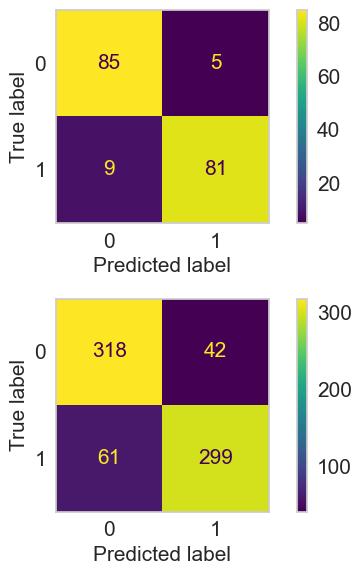

In [213]:
# to get the metrics for the model
eval_metric(
    pipe_log, X_train, y_train, X_test, y_test, 
    'Logistic Regression', average='binary',
)

In [214]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        90
           1       0.94      0.90      0.92        90

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180



In [215]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       360
           1       0.88      0.83      0.85       360

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



In [216]:
print(confusion_matrix(y_test, y_pred_test))

[[85  5]
 [ 9 81]]


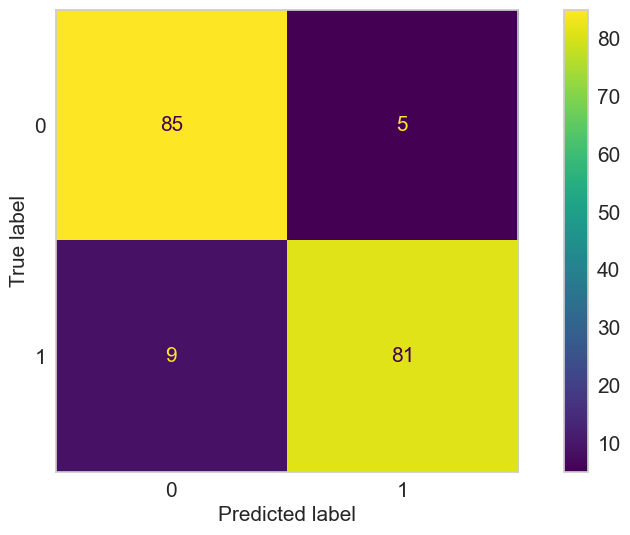

In [217]:
plot_confusion_matrix(pipe_log, X_test, y_test);

### Cross Validate Model
* Use the cross_val_score function to evaluate the model using the train set.

In [218]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [219]:
from sklearn.model_selection import cross_validate

scaler = StandardScaler() 
log_model = LogisticRegression(
    random_state=random_state
)
model = Pipeline([
    ("scaler",scaler),
    ("log_model",log_model)
]) 
scores = cross_validate(
    model, X_train, y_train, 
    scoring = ['accuracy','f1','recall', 'precision'], 
    cv = 10,
    error_score="raise"
)

df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores

,fit_time,score_time,test_accuracy,test_f1,test_recall,test_precision
0,0.016037,0.007001,0.847222,0.849315,0.861111,0.837838
1,0.013003,0.007035,0.847222,0.849315,0.861111,0.837838
2,0.014327,0.006999,0.902778,0.901408,0.888889,0.914286
3,0.013002,0.005999,0.763889,0.738462,0.666667,0.827586
4,0.013001,0.006999,0.888889,0.878788,0.805556,0.966667
5,0.013384,0.006755,0.888889,0.878788,0.805556,0.966667
6,0.012567,0.011435,0.861111,0.868421,0.916667,0.825000
7,0.014043,0.007170,0.791667,0.794521,0.805556,0.783784
8,0.014029,0.007003,0.833333,0.828571,0.805556,0.852941
9,0.012995,0.006002,0.875000,0.876712,0.888889,0.864865


In [220]:
df_scores.mean()[2:]

test_accuracy     0.850000
test_f1           0.846430
test_recall       0.830556
test_precision    0.867747
dtype: float64

### With Best Parameters (GridsearchCV)
* Use the GridSearchCV function to find the best parameters for the model.

In [221]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler() 
log_model = LogisticRegression(
    random_state=random_state
)
# pipeline for GridsearchCV
model = Pipeline([
    ("scaler",scaler),
    ("log_model",log_model)
]) 
# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"] 

# to get 20 values of C between -1 and 5
C = np.logspace(-1, 5, 20)

# balanced: class weights are balanced, None: no class weights
class_weight= ["balanced", None] 

# to get 4 values of solver
solver = ["lbfgs", "liblinear", "sag", "saga"]

# to get all the combinations of penalty, C, class_weight and solver
param_grid = {
    "log_model__penalty" : penalty,
    "log_model__C" : [C,1],
    "log_model__class_weight":class_weight,
    "log_model__solver":solver
} 

In [222]:
# to get the best model
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = 'accuracy', 
#     error_score="raise",
    n_jobs = -1,
    cv=5,      
) 
# grid_model.estimator.get_params().keys()

In [223]:
%%time
grid_model.fit(X_train,y_train)

CPU times: total: 641 ms
Wall time: 11 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [224]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [225]:
grid_model.best_score_

0.8597222222222222

TEST REPORT
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        90
           1       0.94      0.90      0.92        90

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       360
           1       0.88      0.83      0.85       360

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression,0.922222,0.920455,0.9,0.94186,0.856944,0.853067,0.830556,0.876833


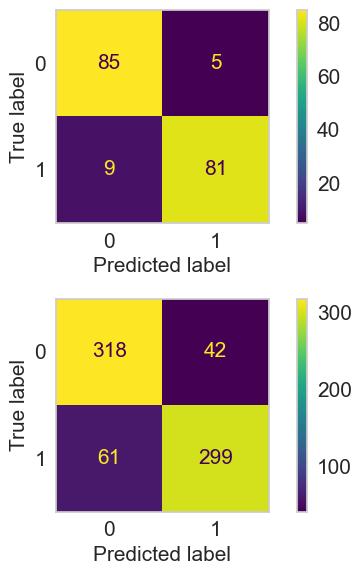

In [226]:
out_score_log = eval_metric(
    pipe_log, X_train, y_train, X_test, y_test, 
    'Logistic Regression', average='binary',
)
out_score_log

```
pipe_grid                               # GridSearchCV model
pipe_grid.get_params()                  # GridSearchCV model params
pipe_grid.get_params().keys()           # GridSearchCV model params keys
pipe_grid.estimator                     # Pipeline model
pipe_grid.estimator.get_params()        # Pipeline model params
pipe_grid.estimator['knn']              # KNeighborsClassifier model
pipe_grid.estimator['knn'].get_params() # KNeighborsClassifier model params
pipe_grid.estimator['knn'].n_neighbors  # seçilen parametrenin değei
```

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

* Use the roc_curve function to calculate the ROC curve and compare logistic regression models with default and tuned parameters. 

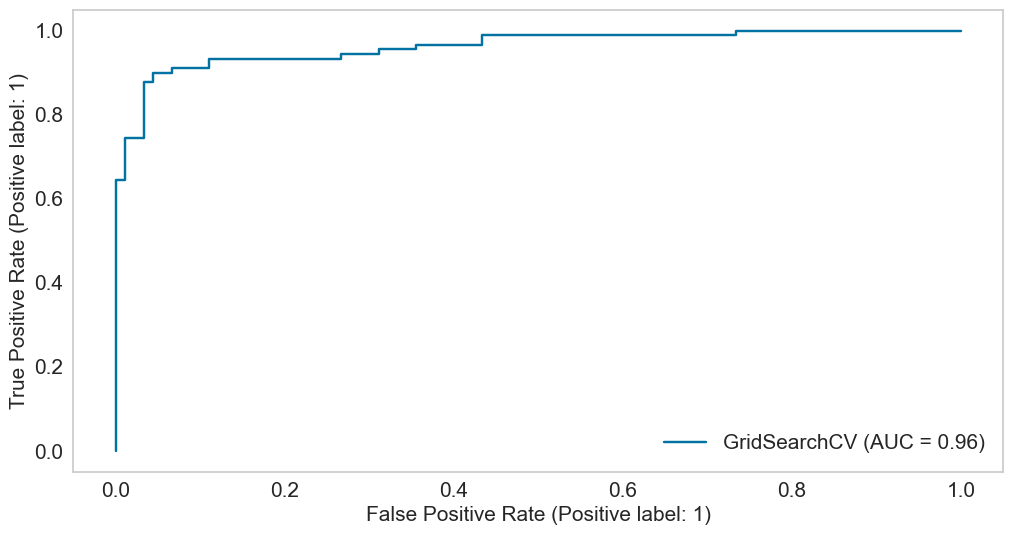

In [227]:
# we use ROC curve to get the AUC score and evaluate the model if it is good or not on every threshold
plot_roc_curve(grid_model, X_test, y_test) 

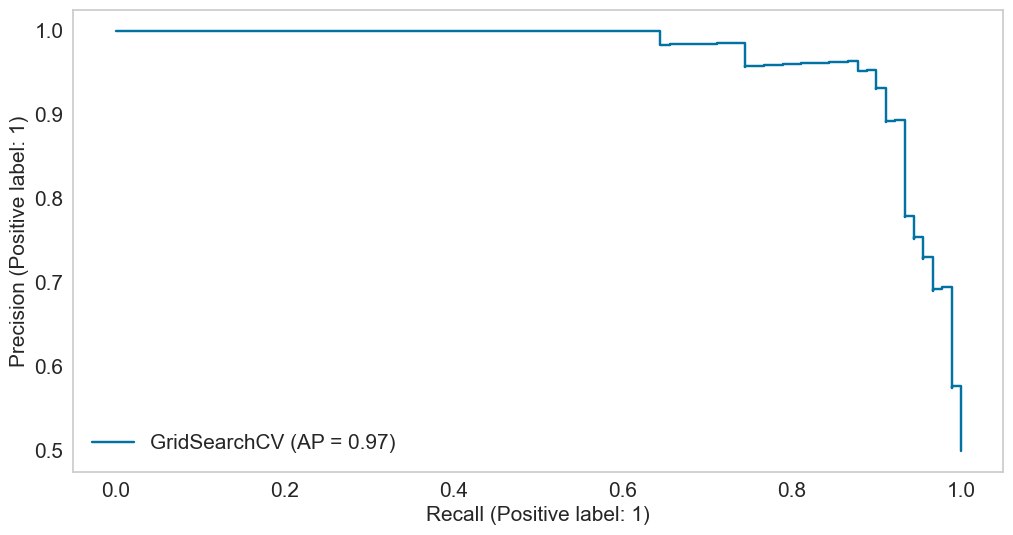

In [228]:
# we use ROC curve to get the AUC score and evaluate the model if it is good or not on every threshold
plot_precision_recall_curve(grid_model, X_test, y_test) 

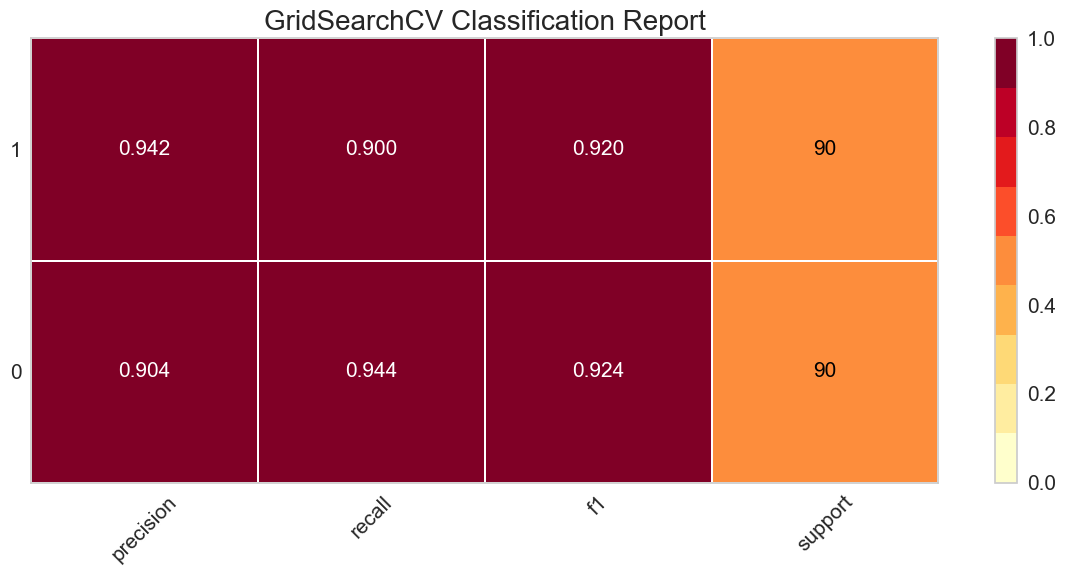

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [229]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(grid_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

# Distance Based Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Implement K-Nearest Neighbors(KNN) Model
* Train the model using the training set with the default parameters.

In [230]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler() 
knn_model = KNeighborsClassifier(
    n_neighbors=5,
)
knn_pipe = Pipeline([
    ("scaler",scaler),
    ("knn_model",knn_model)
]) 
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_model', KNeighborsClassifier())])

In [231]:
y_pred_test = knn_pipe.predict(X_test)
y_pred_train = knn_pipe.predict(X_train)

### Model Performance

TEST REPORT
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        90
           1       0.91      0.80      0.85        90

    accuracy                           0.86       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.86      0.86       180




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       360
           1       0.92      0.85      0.88       360

    accuracy                           0.89       720
   macro avg       0.89      0.89      0.89       720
weighted avg       0.89      0.89      0.89       720



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
K-Nearest Neighbors,0.861111,0.852071,0.8,0.911392,0.8875,0.883117,0.85,0.918919


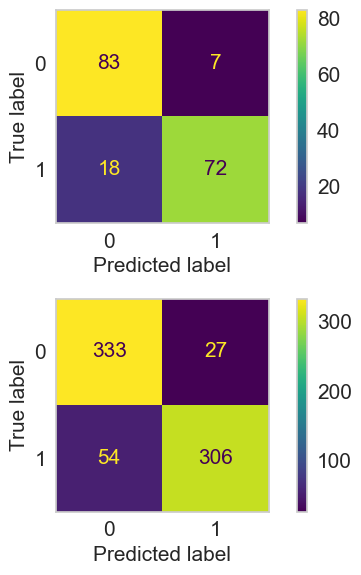

In [232]:
# to get the metrics for the model
eval_metric(
    knn_pipe, X_train, y_train, X_test, y_test, 
    'K-Nearest Neighbors', average='binary',
)

In [233]:
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[83  7]
 [18 72]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        90
           1       0.91      0.80      0.85        90

    accuracy                           0.86       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.86      0.86       180



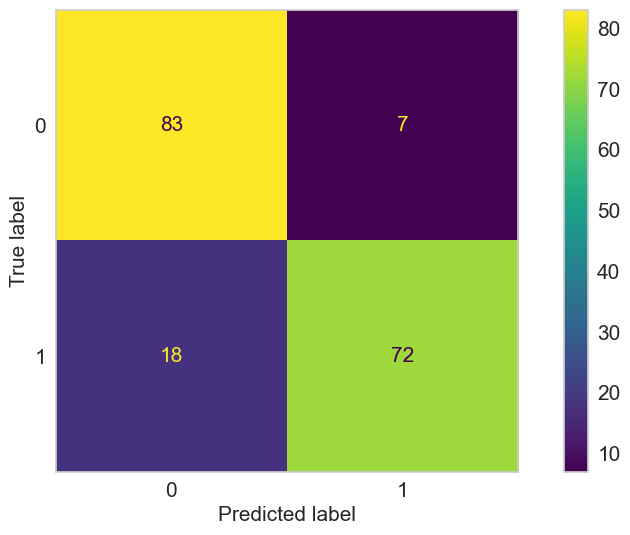

In [234]:
plot_confusion_matrix(knn_pipe, X_test, y_test);

### Elbow Method for Choosing Reasonable K Values
* Use the elbow method to find the optimal number of neighbors.

In [235]:
K = range(2,25)

# find error rates
test_error_rates = []
test_error_ratescv = []

for k in K: 
    scaler = StandardScaler() 
    knn_model = KNeighborsClassifier(
        n_neighbors=k
    ) 
    # pipeline for KNeighbors Classifier regression
    model = Pipeline([
        ("scaler",scaler),
        ("knn", knn_model)
    ]) 
    model.fit(X_train , y_train) 
    y_pred_test = model.predict(X_test)
    # test setindeki hatayı bulmak için
    test_error = 1-accuracy_score(y_test, y_pred_test)  
    test_error_rates.append(test_error)
    
    scaler = StandardScaler() 
    knn_model = KNeighborsClassifier(
        n_neighbors=k
    )
    # pipeline for Cross Validate
    model = Pipeline([
        ("scaler",scaler),
        ("knn", knn_model)
    ]) 
    scores = cross_validate(
        model, X_train, y_train, 
        scoring = ['accuracy'], 
        error_score="raise",
        n_jobs=-1,
        cv = 10,
    )
#     df_scores = pd.DataFrame.from_dict(scores, orient='columns')
#     print(df_scores)
    accuracy_mean = scores["test_accuracy"].mean() 
    test_error = 1-accuracy_mean 
    test_error_ratescv.append(test_error)

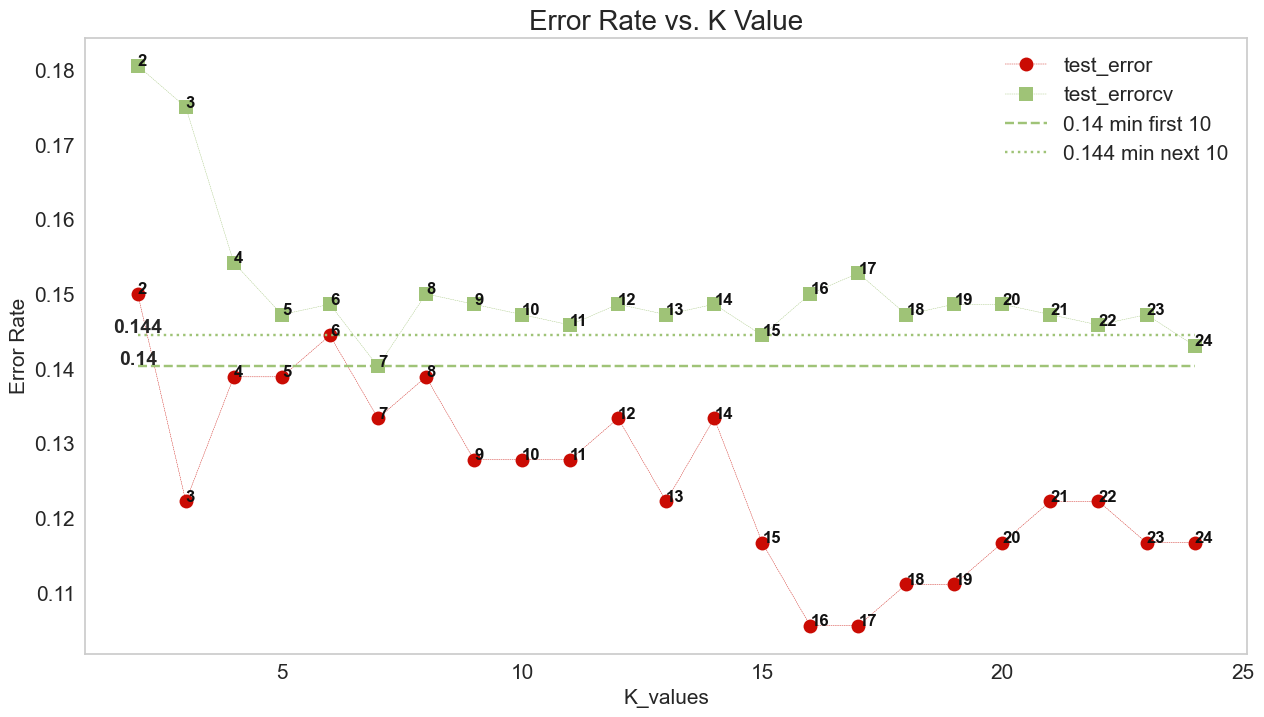

In [236]:
# plot        
plt.figure(figsize=(15,8))

plt.plot(
    K, test_error_rates, 
    color='r', ls='--', lw=0.3, 
    marker='o',mfc='r', ms=10,
    label='test_error',
)
for k, err in zip(K, test_error_rates):
    plt.annotate(k, (k, err), size=12, color='k', weight='heavy') 
    
plt.plot(
    K, test_error_ratescv, 
    color='g', ls='--', lw=0.3,
    marker='s',mfc='g', ms=10,
    label='test_errorcv',
)
for k, err in zip(K, test_error_ratescv):
    plt.annotate(k, (k, err), size=12, color='k', weight='heavy') 
    
plt.text(min(K), y=min(test_error_ratescv[2:10])+0.001, s=min(test_error_ratescv[2:10]).round(3), 
    fontsize=14, weight='bold', ha='center', va='center',rotation='horizontal',
)
plt.hlines(y=min(test_error_ratescv[2:10]), label=f'{min(test_error_ratescv[2:10]).round(3)} min first 10',
    xmin=min(K), xmax=max(K), colors='g', ls="--", 
)
plt.text(min(K), y=min(test_error_ratescv[10:20])+0.001, s=min(test_error_ratescv[10:20]).round(3), 
    fontsize=14, weight='bold', ha='center', va='center',rotation='horizontal',
)
plt.hlines(min(test_error_ratescv[10:20]), label=f'{min(test_error_ratescv[10:20]).round(3)} min next 10',
    xmin=min(K), xmax=max(K), colors='g', ls=":", 
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.legend(loc='upper right')

### Overfiting and underfiting control for k values

In [237]:
def elbow_method(K):
    test_error_rates = []
    train_error_rates = []

    for k in K: 
        scaler = StandardScaler() 
        knn_model = KNeighborsClassifier(
            n_neighbors=k
        )
        # pipeline for KNeighbors Classifier regression
        model = Pipeline([
            ("scaler",scaler),
            ("knn", knn_model)
        ]) 
        model.fit(X_train , y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        
        # test setindeki hatayı bulmak için
        test_error = 1-accuracy_score(y_test, y_pred_test)  
        train_error = 1-accuracy_score(y_train, y_pred_train)
        test_error_rates.append(test_error)
        train_error_rates.append(train_error)
        
    return test_error_rates, train_error_rates

test_error_rates, train_error_rates = elbow_method(K)

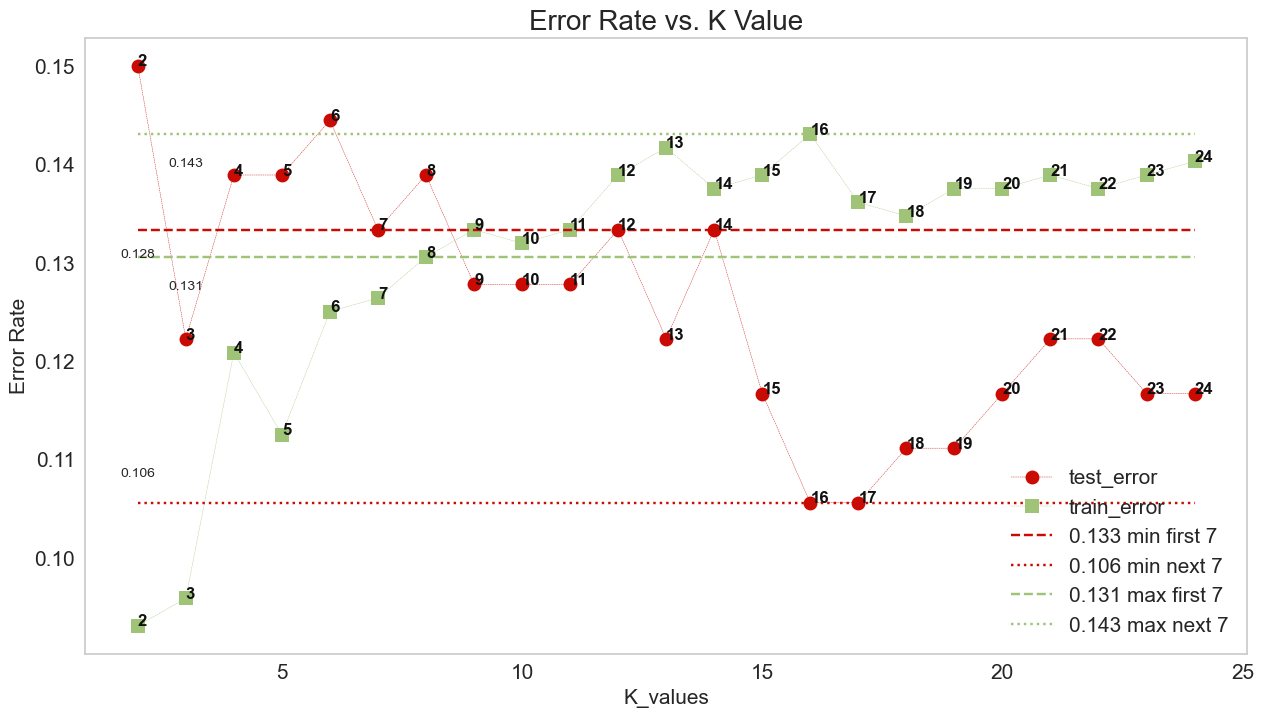

In [238]:
# plot 
plt.figure(figsize=(15,8))
plt.plot(
    K, test_error_rates, 
    color='r', ls='--', lw=0.3, 
    marker='o', mfc='r', ms=10,
    label='test_error',
)      
for k, err in zip(K, test_error_rates):
    plt.annotate(k, (k, err), size=12, color='k', weight='heavy') 
    
plt.plot(
    K, train_error_rates, 
    color='g', ls='--', lw=0.3,
    marker='s', mfc='g', ms=10,
    label='train_error',
)     
for k, err in zip(K, train_error_rates):
    plt.annotate(k, (k, err), size=12, color='k', weight='heavy') 
    
# test first 10 point, next 10
plt.text(min(K), y=min(test_error_rates[2:10])+0.003, s=min(test_error_rates[2:10]).round(3),
    fontsize=10, ha='center', va='center',rotation='horizontal'
)
plt.hlines(y=min(test_error_rates[2:7]), label=f'{min(test_error_rates[2:7]).round(3)} min first 7',
    xmin=min(K), xmax=max(K), colors= 'r', linestyles="--", 
)
plt.text(min(K), y=min(test_error_rates[7:20])+0.003, s=min(test_error_rates[7:20]).round(3),
    fontsize=10, ha='center', va='center',rotation='horizontal'
)
plt.hlines(y=min(test_error_rates[7:20]), label=f'{min(test_error_rates[7:20]).round(3)} min next 7',
    xmin=min(K), xmax=max(K), colors= 'r', linestyles=":", 
)
# train first 10 point, next 10
plt.text(min(K)+1, y=max(train_error_rates[2:7])-0.003, s=max(train_error_rates[2:7]).round(3),
    fontsize=10, ha='center', va='center',rotation='horizontal',
)
plt.hlines(y=max(train_error_rates[2:7]), label=f'{max(train_error_rates[2:7]).round(3)} max first 7',
    xmin=min(K), xmax=max(K), colors= 'g', linestyles="--", 
)
plt.text(min(K)+1, y=max(train_error_rates[7:20])-0.003, s=max(train_error_rates[7:20]).round(3),
    fontsize=10, ha='center', va='center',rotation='horizontal'
)
plt.hlines(y=max(train_error_rates[7:20]), label=f'{max(train_error_rates[7:20]).round(3)} max next 7',
    xmin=min(K), xmax=max(K), colors= 'g', linestyles=":", 
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.legend(loc='lower right')
plt.show()

### Scores by Various K Values
* Select some k values smaller and bigger than the optimal k value to see how the model performs.

WITH K=2

TEST REPORT
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        90
           1       0.97      0.72      0.83        90

    accuracy                           0.85       180
   macro avg       0.87      0.85      0.85       180
weighted avg       0.87      0.85      0.85       180




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       360
           1       1.00      0.81      0.90       360

    accuracy                           0.91       720
   macro avg       0.92      0.91      0.91       720
weighted avg       0.92      0.91      0.91       720



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
K-Nearest Neighbors,0.85,0.828025,0.722222,0.970149,0.906944,0.897397,0.813889,1.0


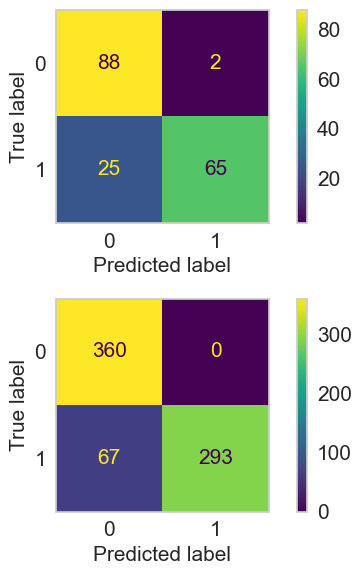

In [239]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler() 
knn_model = KNeighborsClassifier(
    n_neighbors=2,
)
knn_pipe = Pipeline([
    ("scaler",scaler),
    ("knn_model",knn_model)
]) 
knn_pipe.fit(X_train, y_train)

print('WITH K=2\n')
eval_metric(
    knn_pipe, X_train, y_train, X_test, y_test, 
    'K-Nearest Neighbors', average='binary',
)

WITH K=7

TEST REPORT
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        90
           1       0.92      0.80      0.86        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       360
           1       0.92      0.82      0.87       360

    accuracy                           0.87       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.87      0.87       720



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
K-Nearest Neighbors,0.866667,0.857143,0.8,0.923077,0.873611,0.866373,0.819444,0.919003


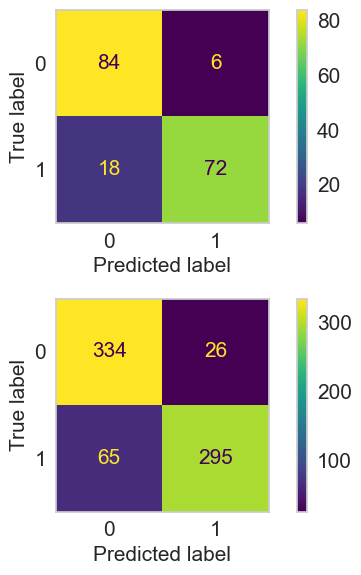

In [240]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler() 
knn_model = KNeighborsClassifier(
    n_neighbors=7,
)
knn_pipe = Pipeline([
    ("scaler",scaler),
    ("knn_model",knn_model)
]) 
knn_pipe.fit(X_train, y_train)

print('WITH K=7\n')
eval_metric(
    knn_pipe, X_train, y_train, X_test, y_test, 
    'K-Nearest Neighbors', average='binary',
)

WITH K=21

TEST REPORT
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        90
           1       0.95      0.80      0.87        90

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       360
           1       0.90      0.81      0.85       360

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
K-Nearest Neighbors,0.877778,0.86747,0.8,0.947368,0.861111,0.854227,0.813889,0.898773


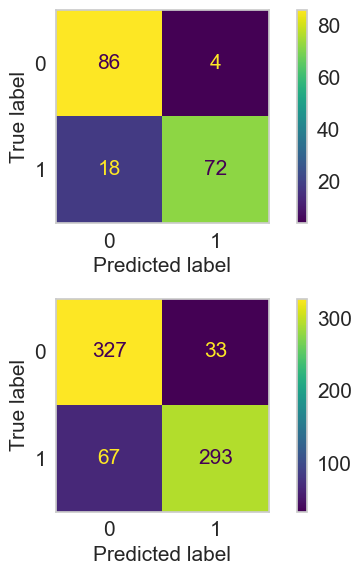

In [241]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler() 
knn_model = KNeighborsClassifier(
    n_neighbors=21,
)
knn_pipe = Pipeline([
    ("scaler",scaler),
    ("knn_model",knn_model)
]) 
knn_pipe.fit(X_train, y_train)

print('WITH K=21\n')
eval_metric(
    knn_pipe, X_train, y_train, X_test, y_test, 
    'K-Nearest Neighbors', average='binary',
)

WITH K=5

TEST REPORT
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        90
           1       0.91      0.80      0.85        90

    accuracy                           0.86       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.86      0.86       180




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       360
           1       0.92      0.85      0.88       360

    accuracy                           0.89       720
   macro avg       0.89      0.89      0.89       720
weighted avg       0.89      0.89      0.89       720



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
K-Nearest Neighbors,0.861111,0.852071,0.8,0.911392,0.8875,0.883117,0.85,0.918919


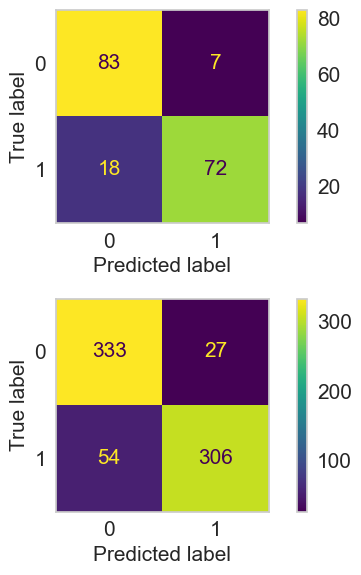

In [242]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler() 
knn_model = KNeighborsClassifier(
    n_neighbors=5,
)
knn_pipe = Pipeline([
    ("scaler",scaler),
    ("knn_model",knn_model)
]) 
knn_pipe.fit(X_train, y_train)

print('WITH K=5\n')
eval_metric(
    knn_pipe, X_train, y_train, X_test, y_test, 
    'K-Nearest Neighbors', average='binary',
)

### Cross Validate
* Use the cross_val_score function to evaluate the model using the train set. Use optimal k value which you found in the elbow method.

In [243]:
from sklearn.model_selection import cross_validate, cross_val_score

scaler = StandardScaler() 
knn_model = KNeighborsClassifier(
    n_neighbors=5,
)
# pipeline for Cross Validate
model = Pipeline([
    ("scaler",scaler),
    ("knn_model",knn_model)
]) 
scores = cross_validate(
    model, X_train, y_train, 
    scoring = ['precision','recall','f1','accuracy'], 
    error_score="raise",
    n_jobs=-1,
    cv=10,
)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.007997,0.020000,0.833333,0.833333,0.833333,0.833333
2,0.010013,0.023990,0.941176,0.888889,0.914286,0.916667
3,0.011003,0.025000,0.888889,0.888889,0.888889,0.888889
4,0.011001,0.020000,0.793103,0.638889,0.707692,0.736111
5,0.009986,0.021010,0.964286,0.750000,0.843750,0.861111
6,0.011000,0.019263,0.962963,0.722222,0.825397,0.847222
7,0.012998,0.019263,0.864865,0.888889,0.876712,0.875000
8,0.014001,0.018263,0.843750,0.750000,0.794118,0.805556
9,0.012262,0.013003,0.882353,0.833333,0.857143,0.861111
10,0.009269,0.011999,0.891892,0.916667,0.904110,0.902778


In [244]:
df_scores.mean()[2:]        

test_precision    0.886661
test_recall       0.811111
test_f1           0.844543
test_accuracy     0.852778
dtype: float64

- test_accuracy:0.86   , train_accuracy:0.89
- test_accuracy:0.85   (cross validation)
- (k=5 with elbow) with 25 wrong prediction


### Gridsearch Method for Choosing Reasonable K Values
* Use the GridSearchCV function to find the best parameters for the model. this method is brute force method to find the best parameters, and it takes a long time to run for KNN. You will get different k values because of you will use different parameters, and also gridsearch method tries to find minimum error. Sometimes it get larger k values for optimal but for  sake of reduce complexity we use the elbow method to find the optimal k value.

In [245]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler() 
knn_model = KNeighborsClassifier()  

# pipeline for GridsearchCV
model = Pipeline([
    ("scaler",scaler),
    ("knn", knn_model)
])
param_grid = {
    'knn__n_neighbors': range(1,30),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski'],
    'knn__p': [1,2],
}
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring='accuracy',
    n_jobs=-1,
    cv=10
) 
# grid_model.estimator.get_params().keys()

In [246]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 1.95 s
Wall time: 4.02 s


GridSearchCV(cv=10, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['minkowski'],
                         'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [247]:
grid_model.best_params_

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 23,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [248]:
grid_model.best_score_

0.8625

TEST REPORT
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        90
           1       0.95      0.83      0.89        90

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       360
           1       0.91      0.81      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.86       720
weighted avg       0.87      0.87      0.86       720



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
K-Nearest Neighbors,0.894444,0.887574,0.833333,0.949367,0.865278,0.857562,0.811111,0.909657


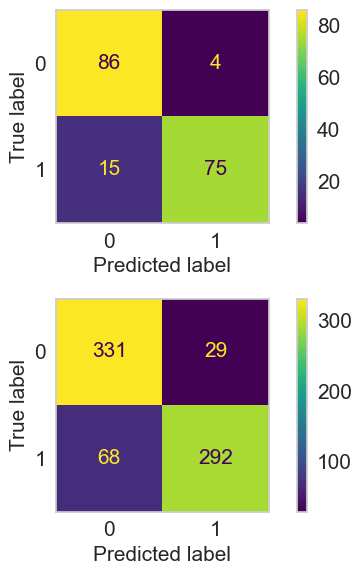

In [249]:
out_score_knn = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'K-Nearest Neighbors', average='binary',
)
out_score_knn

### compare GridSearchCV with Elbow Results

In [250]:
grid_model.best_params_

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 23,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [251]:
K = range(2,25)

# find error rates
test_error_rates = []
test_error_ratescv = []

for k in K: 
    scaler = StandardScaler() 
    knn_model = KNeighborsClassifier(
        n_neighbors=k,
        p=1
    ) 
    # pipeline for KNeighbors Classifier regression
    model = Pipeline([
        ("scaler",scaler),
        ("knn", knn_model)
    ]) 
    model.fit(X_train , y_train) 
    y_pred_test = model.predict(X_test)
    # test setindeki hatayı bulmak için
    test_error = 1-accuracy_score(y_test, y_pred_test)  
    test_error_rates.append(test_error)
    
    scaler = StandardScaler() 
    knn_model = KNeighborsClassifier(
        n_neighbors=k,
        p=1
    )
    # pipeline for Cross Validate
    model = Pipeline([
        ("scaler",scaler),
        ("knn", knn_model)
    ]) 
    scores = cross_validate(
        model, X_train, y_train, 
        scoring = ['accuracy'], 
        error_score="raise",
        n_jobs=-1,
        cv = 10,
    )
#     df_scores = pd.DataFrame.from_dict(scores, orient='columns')
#     print(df_scores)
    accuracy_mean = scores["test_accuracy"].mean() 
    test_error = 1-accuracy_mean 
    test_error_ratescv.append(test_error)

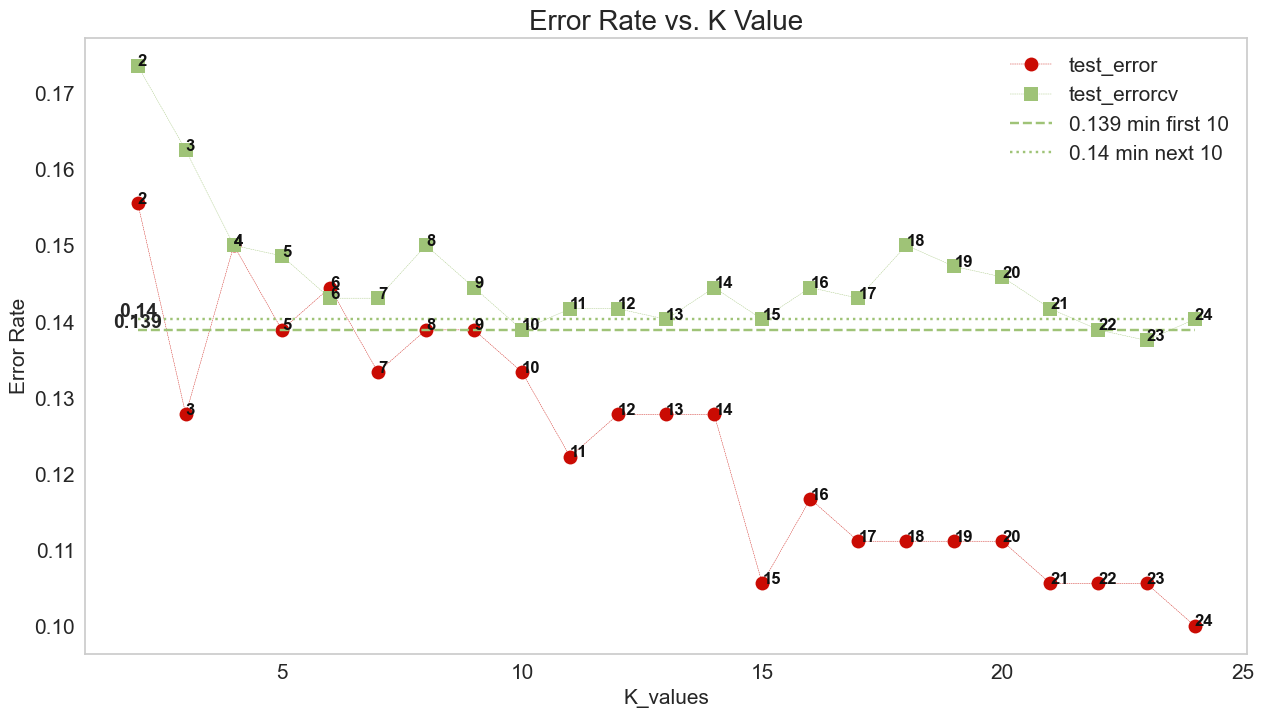

In [252]:
# plot        
plt.figure(figsize=(15,8))

plt.plot(
    K, test_error_rates, 
    color='r', ls='--', lw=0.3, 
    marker='o',mfc='r', ms=10,
    label='test_error',
)
for k, err in zip(K, test_error_rates):
    plt.annotate(k, (k, err), size=12, color='k', weight='heavy') 
    
plt.plot(
    K, test_error_ratescv, 
    color='g', ls='--', lw=0.3,
    marker='s',mfc='g', ms=10,
    label='test_errorcv',
)
for k, err in zip(K, test_error_ratescv):
    plt.annotate(k, (k, err), size=12, color='k', weight='heavy') 
    
plt.text(min(K), y=min(test_error_ratescv[2:10])+0.001, s=min(test_error_ratescv[2:10]).round(3), 
    fontsize=14, weight='bold', ha='center', va='center',rotation='horizontal',
)
plt.hlines(y=min(test_error_ratescv[2:10]), label=f'{min(test_error_ratescv[2:10]).round(3)} min first 10',
    xmin=min(K), xmax=max(K), colors='g', ls="--", 
)
plt.text(min(K), y=min(test_error_ratescv[10:20])+0.001, s=min(test_error_ratescv[10:20]).round(3), 
    fontsize=14, weight='bold', ha='center', va='center',rotation='horizontal',
)
plt.hlines(min(test_error_ratescv[10:20]), label=f'{min(test_error_ratescv[10:20]).round(3)} min next 10',
    xmin=min(K), xmax=max(K), colors='g', ls=":", 
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.legend(loc='upper right')

# Compare The Models

## Evaluating ROC Curves and AUC
*Use the roc_curve function to calculate the ROC curve and compare KNN models with default and tuned parameters.

In [253]:
y_pred_proba = grid_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9543827160493827

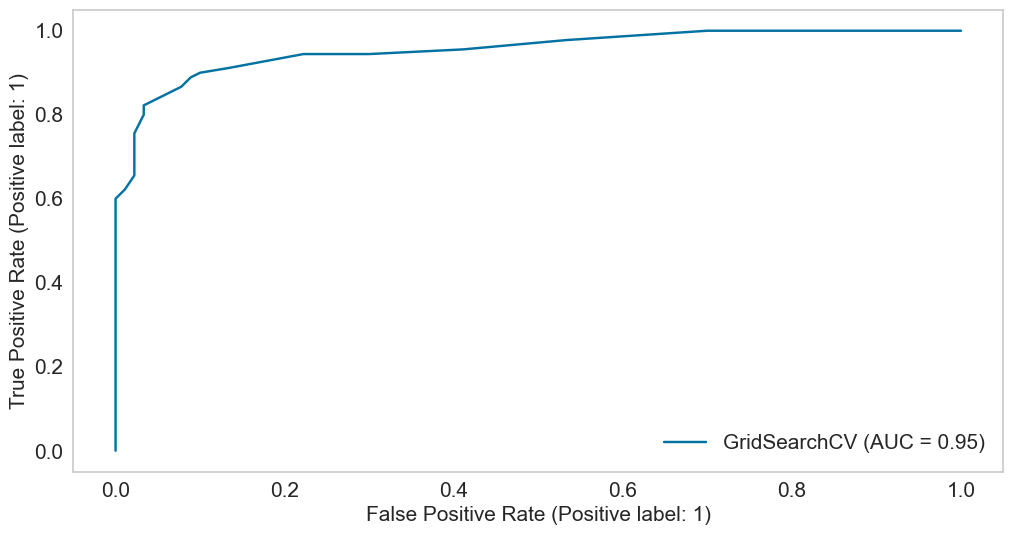

In [254]:
# best grid model
plot_roc_curve(grid_model, X_test, y_test) 

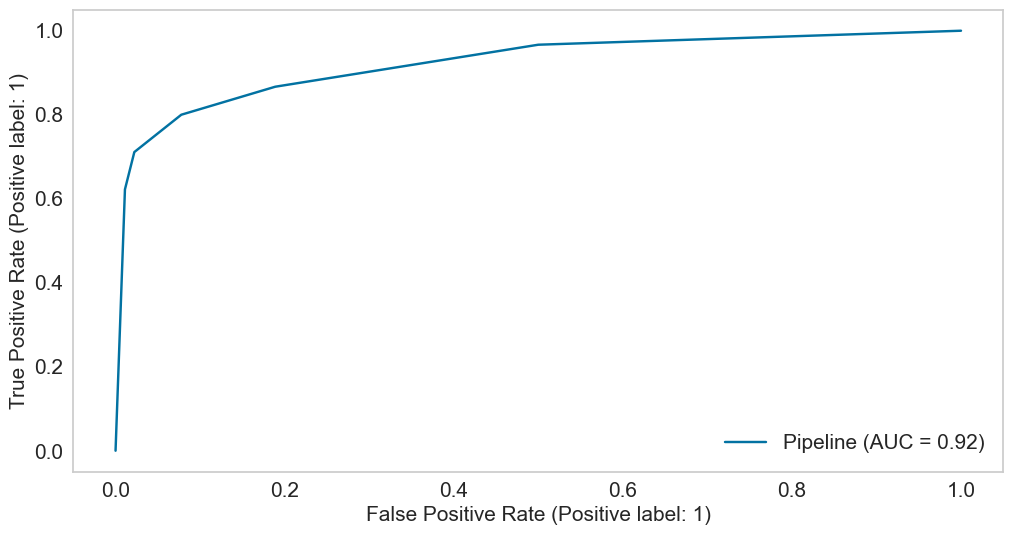

In [255]:
# best elbow model
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler() 
knn_model = KNeighborsClassifier(
    n_neighbors=5,
)
knn_pipe = Pipeline([
    ("scaler",scaler),
    ("knn_model",knn_model)
]) 
knn_pipe.fit(X_train, y_train)

plot_roc_curve(knn_pipe, X_test, y_test)

## Compare Model Performance

TEST REPORT
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        90
           1       0.95      0.83      0.89        90

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       360
           1       0.91      0.81      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.86       720
weighted avg       0.87      0.87      0.86       720



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
K-Nearest Neighbors,0.894444,0.887574,0.833333,0.949367,0.865278,0.857562,0.811111,0.909657


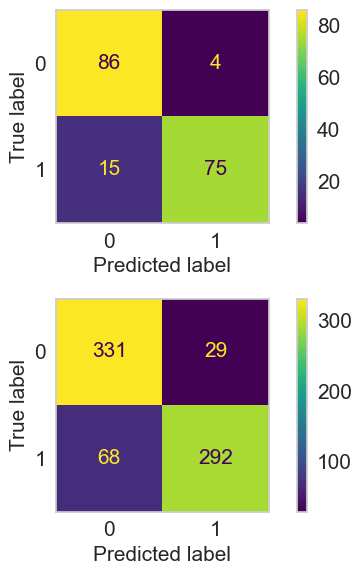

In [256]:
eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'K-Nearest Neighbors', average='binary',
)

WITH K=5

TEST REPORT
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        90
           1       0.91      0.80      0.85        90

    accuracy                           0.86       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.86      0.86       180




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       360
           1       0.92      0.85      0.88       360

    accuracy                           0.89       720
   macro avg       0.89      0.89      0.89       720
weighted avg       0.89      0.89      0.89       720



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
K-Nearest Neighbors,0.861111,0.852071,0.8,0.911392,0.8875,0.883117,0.85,0.918919


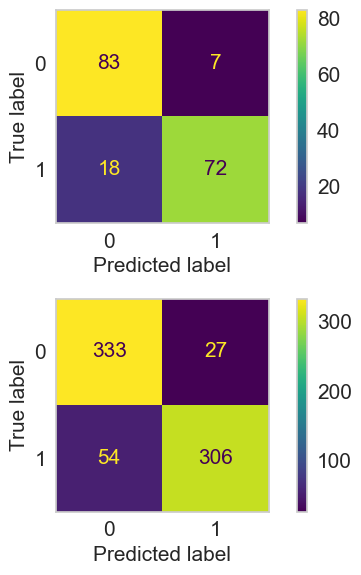

In [257]:
print('WITH K=5\n')
out_score_knn = eval_metric(
    knn_pipe, X_train, y_train, X_test, y_test, 
    'K-Nearest Neighbors', average='binary',
)
out_score_knn

# Conclusion 
* Write a short summary of your findings, and decide which model you will use and why.

In [258]:
compare = pd.concat([
    out_score_log, out_score_knn
])
compare

,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression,0.922222,0.920455,0.9,0.941860,0.856944,0.853067,0.830556,0.876833
K-Nearest Neighbors,0.861111,0.852071,0.8,0.911392,0.887500,0.883117,0.850000,0.918919


* **log_model** Accuracy Score: 0.92 
* **knn** Accuracy Score:0.86 (k=5 with elbow)  - 0.89 (k=23 with gridsearch)


* **log_model** AUC : 0.96    
* **knn** AUC : 0.92 (elbow) - 0.95 (gridsearch)

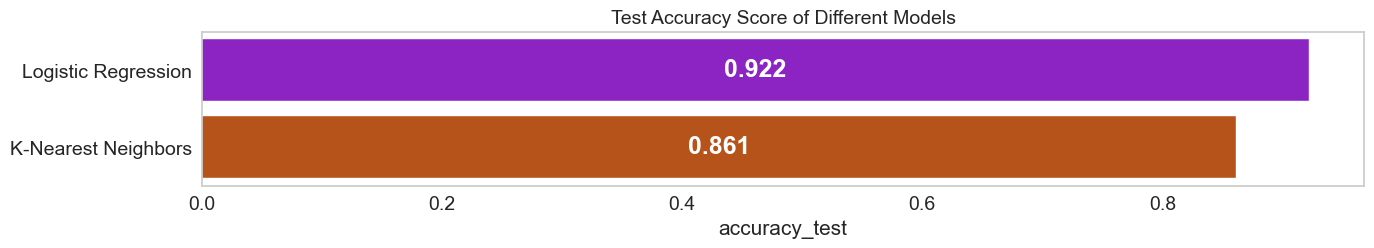

In [259]:
compare = compare.sort_values(by='accuracy_test', ascending=False)

plt.figure(figsize=(15,2))
ax = sns.barplot(x='accuracy_test', y=compare.index, data=compare.round(3), palette="gnuplot")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Accuracy Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

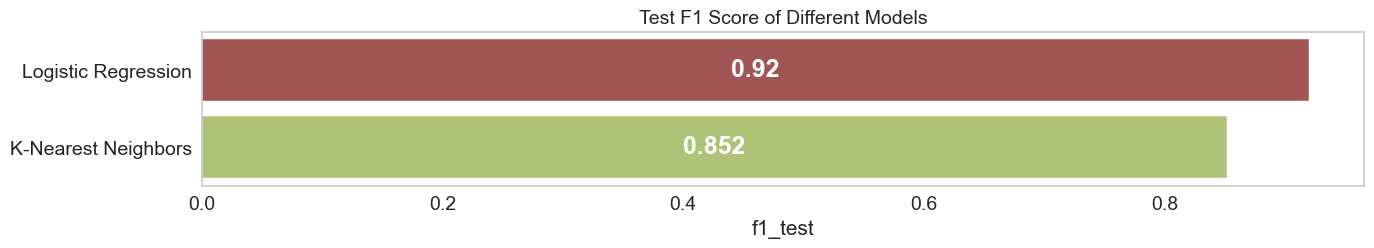

In [260]:
compare = compare.sort_values(by='f1_test', ascending=False)

plt.figure(figsize=(15,2))
ax = sns.barplot(x='f1_test', y=compare.index, data=compare.round(3), palette="tab20b_r")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test F1 Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

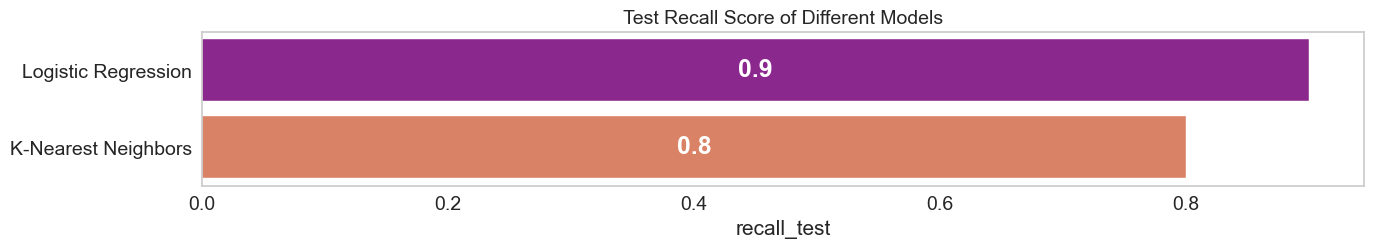

In [261]:
compare = compare.sort_values(by='recall_test', ascending=False)

plt.figure(figsize=(15,2))
ax = sns.barplot(x='recall_test', y=compare.index, data=compare.round(3), palette="plasma")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Recall Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

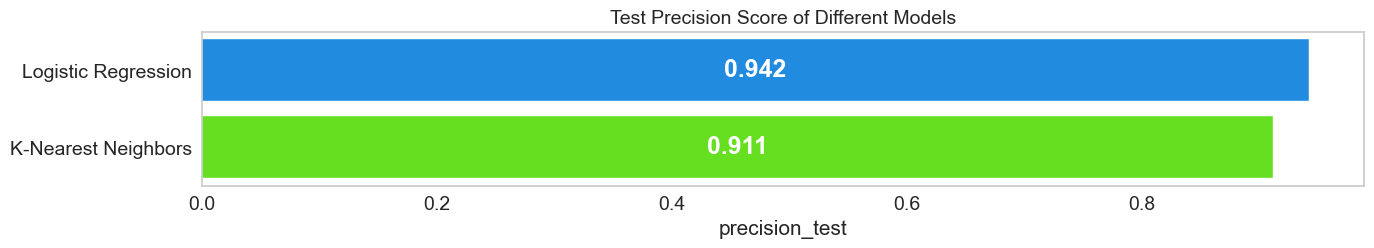

In [262]:
compare = compare.sort_values(by='precision_test', ascending=False)

plt.figure(figsize=(15,2))
ax = sns.barplot(x='precision_test', y=compare.index, data=compare.round(3), palette="gist_rainbow_r")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Precision Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

* As a conclusion we aplied two models to predict raisins classes and we got prety decent scores both of them
* We decided to use the Logistic Model because of its slightly better score than the knn models, plus the interpretability of logistic regression and its lower computational cost.

# Other Codes 

In [263]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [265]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type':'domain'}, {'type':'domain'}]]
)
fig.add_trace(
    go.Pie(
        labels=df['Class'],
        textposition='inside',
        textinfo='label+value+percent',
        pull=[0.05, 0.05],
        hole=.3,
        name="Count"
    ),
    1, 1
)
fig.add_trace(
    go.Pie(
        labels=df.select_dtypes(include='number').corr()['Class'].round(1),
        text=df.select_dtypes(include='number').corr()['Class'].index.to_list(),
        textposition='inside',
        textinfo='text+label+percent',
        pull=[0.033 for i in range(10)],
#         direction='clockwise',
        hole=.3,sort=False,
        name="Corr",
    ),
    1, 2
)
fig.update_layout(
    annotations=[
        dict(text='Count', x=0.185, y=0.5, font_size=20, showarrow=False),
        dict(text='Corr', x=0.805, y=0.5, font_size=20, showarrow=False)]
)
fig.show()

In [266]:
fig = px.pie(
    df, 
    names='Class', 
    color_discrete_sequence=px.colors.sequential.Sunsetdark,
    title='Population of European continent', 
    height=450, width=450,
#     hole=.3,
)
fig.update_traces(
    textinfo='label+value+percent',
    pull=[0.05, 0.05],
)
fig.update_layout(
#     annotations=[dict(text='Class', x=0.5, y=0.5, font_size=20, showarrow=False)]
)
fig.show()

In [ ]:
# !pip install jupyter-dash 
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

# Load Data - change target column to last
df_copy = df.copy() 
df_copy.drop(columns=['Class'], inplace=True)
df_copy['Class'] = df['Class']
df_dash = df_copy

# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H2(
        f'Analysis of Target Label - {df_dash.columns[-1]}',
        style={'textAlign':'center'}
    ),
    html.P("Target:"),
    dcc.Dropdown(
        id='label', clearable=True,
        options=[df_dash.columns[-1]], value=df_dash.columns[-1],
    ),
#     html.P("Features:"),
#     dcc.Dropdown(
#         id='features', clearable=False,
#         options=df_dash.columns[:-1], value=[df_dash.columns[0]], 
#     ),
    html.P("Features:"),
    dcc.Dropdown(
        id='features', multi=True,
        options=df_dash.columns[:-1],
        value=[df_dash.columns[0]], 
    ),
    dcc.Graph(id="graph"),
])

# Define callback to update graph
@app.callback(
    Output("graph", "figure"), 
    Input("features", "value"), 
    Input("label", "value"),
)
def generate_chart(features, label):
    fig = make_subplots(rows=2, cols=len(features if features else [1]))
    for i, feature in enumerate(features):
        fig.append_trace(go.Box( 
            x = df_dash[label],
            y = df_dash[feature],
            name=df_dash[feature].name+'_box',
            text=df_dash[label].index,
            customdata=df_dash.loc[:,df_dash.columns[:9]],
            hovertemplate="<br>".join([
                f"{label}"+": %{x}",
                f"{feature}"+": %{y}",
                "index: %{text}",
                "datas    :%{customdata}",]),
        ),row=1, col=i+1)
        fig.append_trace(go.Bar(
            x = df_dash[label],
            y = df_dash[feature],
#             orientation='h', 
            textposition='auto',
            marker_color=px.colors.sequential.Viridis,
            opacity=1,
            name=df_dash[feature].name+'_bar',
            customdata=df_dash[label].index,            
            hovertemplate="<br>".join([
                f"{label}"+": %{x}",
                f"{feature}"+": %{y}",
                "index: %{customdata}",
            ]),
        ),row=2, col=i+1)
        fig.update_xaxes(
            title_text=f"X: {label}",
            titlefont_size=16,
            tickfont_size=12,            
            row=2,col=1
        )
        fig.update_yaxes(
            title_text=f"y: {feature}",
            titlefont_size=16,
            tickfont_size=12, 
            row=2,col=1
        )
        fig.update_layout(
            height=1288, width=1000,
            title='Title',
            xaxis_title=f"X: {label}",
            xaxis_tickfont_size=12,
            yaxis=dict(
                title=f"y: {feature}",
                titlefont_size=16,
                tickfont_size=12,
            ),
        )
    return fig

if __name__ == "__main__":
#     app.run_server(debug=True)
    # Run app and display result inline in the notebook
    app.run_server(mode='inline')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___